# Feature Extractor descriptions

Convpaint utilizes a **variety of pre-trained models for feature extraction**, allowing users to choose the most suitable model for their specific task. These models are designed to capture different aspects of the input data, enabling the most effective segmentation and analysis in each case.

As a **general guideline**:

- Use the default **`VGG16` or `Ilastik`** for segmentation tasks that are limited to **local features**, such as edges, colors, or textures. If you can classify your objects based on the question **"What does it look like here?"**, these are good starting points.
- Use the default **`dino_jafar`** for tasks involving **contextual features**, such as shapes and relative positions. If you need to answer the question **"What is this part of?"** or **"How is it arranged?"**, this is a good starting point.

In both cases, apply **Downscaling** if you don't need single-pixel resolution but want to speed up processing. Apply **Segmentation Smoothening** as appropriate.

## Behind the curtains

Convpaint's **`FeatureExtractor` class** serves as the backbone for feature extraction in the framework, ensuring features are processed and provided in a consistent manner across different models. This also makes it very **easy to add new feature extractors**—see the provided template in case you want to implement your own, and do not hesitate to reach out to us for assistance.

## Currently Available Feature Extractors

We have **tested over 20 models** available in Convpaint. Each was used to segment images of 3 datasets: **Cellpose for cellular images, BCSS for histological slides, and foodseg for natural images**. In each dataset, between 520 and 540 images were segmented based on 3 different levels of annotation (0.25%, 1%, 2.5%). The diagram below shows the mean performance for each dataset. For a more detailed **comparison and explanation, please refer to the [preprint of the paper](https://doi.org/10.1101/2024.09.12.610926)**.

<img src='../images/fe_quantifications/FEs_overview.png' style='width: 600px' />

Below, we provide a brief **description and most common use cases for each model**, including a diagram of their performance in terms of mIoU and segmentation speed across the annotation levels:

In [ ]:
import skimage
import matplotlib.pyplot as plt

plot_path = "../images/fe_quantifications/"
def show_plots(model_names, titles, factor=2):
    if not len(model_names) == len(titles):
        raise ValueError("model_names and titles must have the same length")
    fig, ax = plt.subplots(1, len(model_names), figsize=(factor * len(model_names), factor), dpi=400 / factor)
    if len(model_names) == 1:
        ax = [ax]
    for model_name, title, axis in zip(model_names, titles, ax):
        name = "radar_plot_" + model_name + "_(relative)_overlay.png"
        img = skimage.io.imread(plot_path + name)
        img = img[80:-160]
        axis.imshow(img)
        axis.set_title(title, fontsize=12/4*factor)
        axis.axis("off")
    plt.show()

### VGG16 (CNN)

VGG16 is a convolutional neural network model that is 16 layers deep, and is **Convpaint's original feature extractor**. It is known for its simplicity and effectiveness in image classification tasks. The architecture consists of a series of convolutional layers followed by max-pooling layers, and it uses ReLU activations. VGG16 has been widely used as a backbone for various computer vision tasks and is available in many deep learning frameworks.

For Convpaint, we recommend only using very **early layers** of VGG16 and combining those in **multiple scales** into a more complex feature representation (feature pyramid).

Like this, VGG16 can capture fine-grained details at different resolutions, making it suitable for tasks that require a **high level of spatial awareness**.

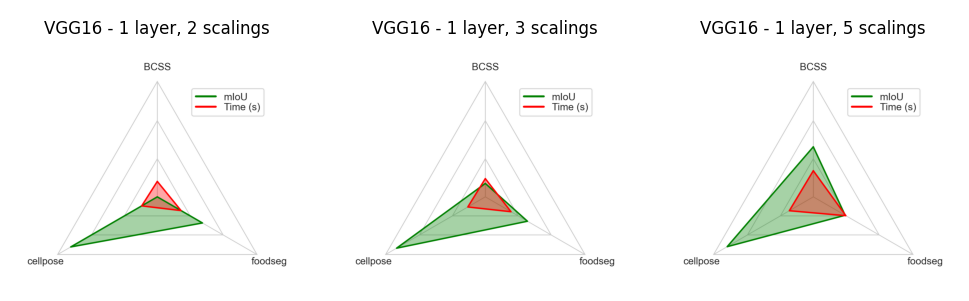

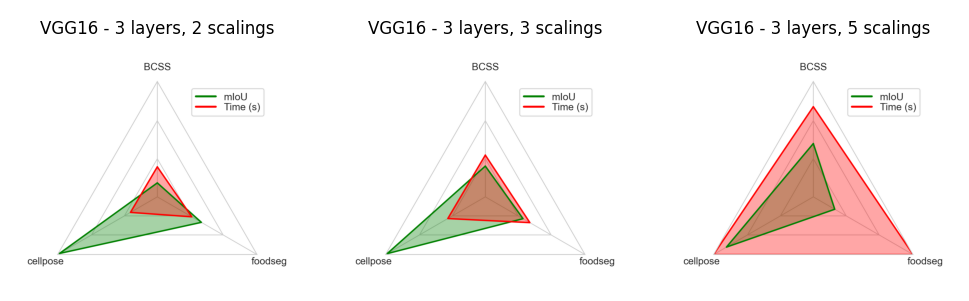

In [3]:
show_plots(["vgg16-l1s2", "vgg16-l1s3", "vgg16-l1s5"], ["VGG16 - 1 layer, 2 scalings", "VGG16 - 1 layer, 3 scalings", "VGG16 - 1 layer, 5 scalings"])
show_plots(["vgg16-l3s2", "vgg16-l3s3", "vgg16-l3s5"], ["VGG16 - 3 layers, 2 scalings", "VGG16 - 3 layers, 3 scalings", "VGG16 - 3 layers, 5 scalings"])

### Ilastik (optional)

Ilastik uses **pre-defined filters** (and technically does not count as a pre-trained model). It is a popular tool for interactive image segmentation and classification using local image features.

We implemented a workflow in Convpaint that leverages Ilastik's **full filter set** (multiple filters at multiple sizes), and additionally allows the user to combine those in multiple scales into a more complex feature representation (feature pyramid).

Like this, Ilastik is effective in segmenting images based on **local image features at different scales**.

*Sidenote: The user needs to install `napari-ilastik` in order to use Ilastik in Convpaint, otherwise it will not be available as a feature extractor. Run `pip install napari-convpaint[ilastik]` to install it. And make sure to also have fastfilters installed (`conda install -c ilastik-forge fastfilters`).*

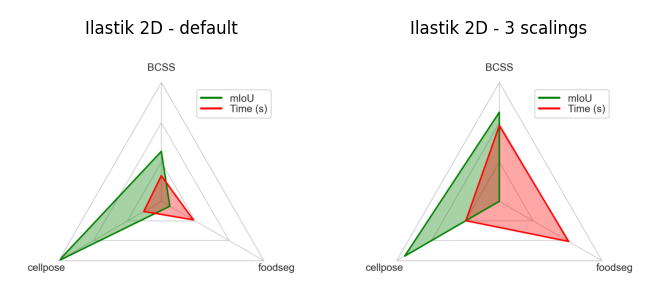

In [212]:
show_plots(["ilastik_2d-s", "ilastik_2d-m"], ["Ilastik 2D - default", "Ilastik 2D - 3 scalings"])

### Cellpose (optional)

Cellpose is a segmentation model very popular for **biological image analysis**. It is designed to work well with a variety of cell types and imaging conditions, making it a versatile choice for researchers in the life sciences. Cellpose uses a deep learning approach to segment cells in images.

In Convpaint, we integrated Cellpose as a feature extractor and recommend considering it for tasks that involve **cell segmentation and analysis**.

*Sidenote: The user needs to install `cellpose` in order to use Cellpose in Convpaint, otherwise it will not be available as a feature extractor. Run `pip install napari-convpaint[cellpose]` to install it.*

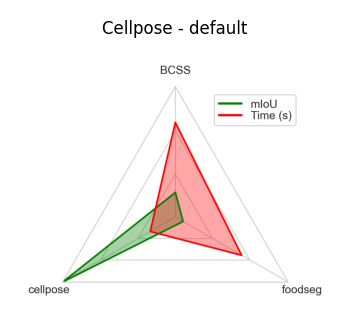

In [213]:
show_plots(["cellpose"], ["Cellpose - default"])

### Gaussian

This is a **minimal feature extractor model**, that only captures features based on a single **gaussian filter**.

While it was originally implemented with the goal to showcase how easy new feature extractors can be added to Convpaint, it can still be **useful for its speed in simple tasks** or as a baseline for comparison with more complex models.

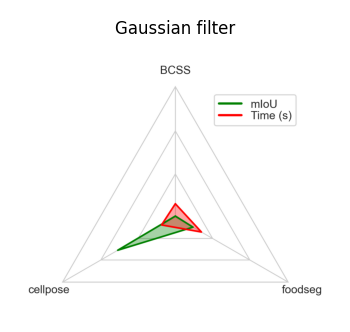

In [214]:
show_plots(["gaussian"], ["Gaussian filter"])

### EfficientNet

This is a convolutional neural network from a family of models optimized for **accuracy and efficiency** through compound scaling of depth, width, and resolution.

In Convpaint, it can offer a good balance between performance and computational cost for certain tasks. We recommend considering EfficientNet when the task requires **efficient feature extraction with limited resources**, while still retaining a reasonable level of spatial detail.

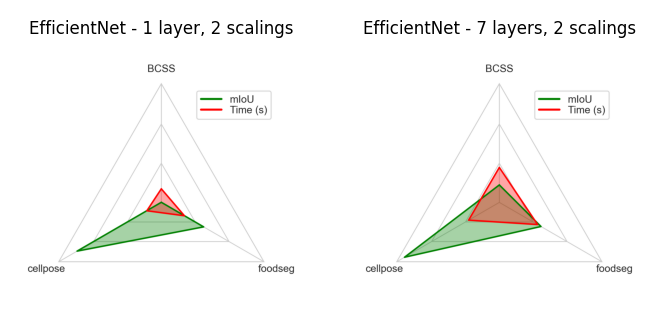

In [215]:
show_plots(["efficient_net-s", "efficient_net-m"], ["EfficientNet - 1 layer, 2 scalings", "EfficientNet - 7 layers, 2 scalings"])

### ConvNeXT

ConvNeXT is a **modern convolutional neural network** architecture designed for high-quality feature extraction in image analysis.

In Convpaint, we recommend considering ConvNeXT when the task benefits **more from semantic context** than from fine-grained spatial detail.

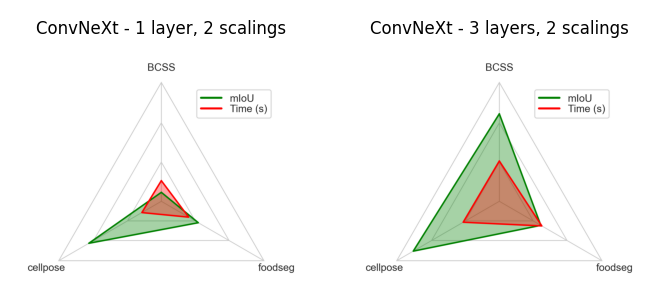

In [216]:
show_plots(["convnext-s", "convnext-m"], ["ConvNeXt - 1 layer, 2 scalings", "ConvNeXt - 3 layers, 2 scalings"])

### DINOv2

DINOv2 is a self-supervised, vision transformer model trained on large-scale image data to learn **general-purpose visual representations**.

In Convpaint, it provides **strong semantic features**. We recommend using DINOv2 when the task benefits from **rich semantic understanding** and transferability across diverse image types, rather than focusing on fine spatial resolution. DINOv2 is particularly effective for tasks that require a deep understanding of image content and context.

DINOv2 has shown particularly good results on:
- Natural images such as food, objects, people, animals
- Medical images like histology slides or x-rays

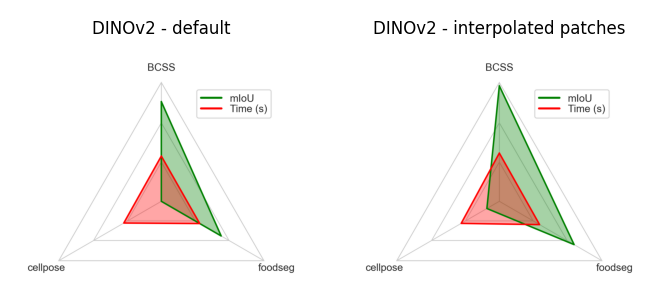

In [217]:
show_plots(["dinov2_patches", "dinov2_interpol"], ["DINOv2 - default", "DINOv2 - interpolated patches"])

### Jafar DINOv2

JAFAR (Jack up Any Feature at Any Resolution) is a lightweight, attention-based **feature upsampler** designed to enhance spatial resolution from any foundation vision encoder to arbitrary output sizes. It fuses low-level image details with semantically enriched low-resolution features, enabling sharper and more spatially precise feature maps—without high-resolution supervision.

Given the good results with DINOv2 as a feature extractor, often only limited by the resolution of the input features, we implemented feature extraction using **JAFAR on top of DINOv2**.

This is ***the* recommended approach** for tasks that require **high spatial resolution together with rich semantic understanding**.

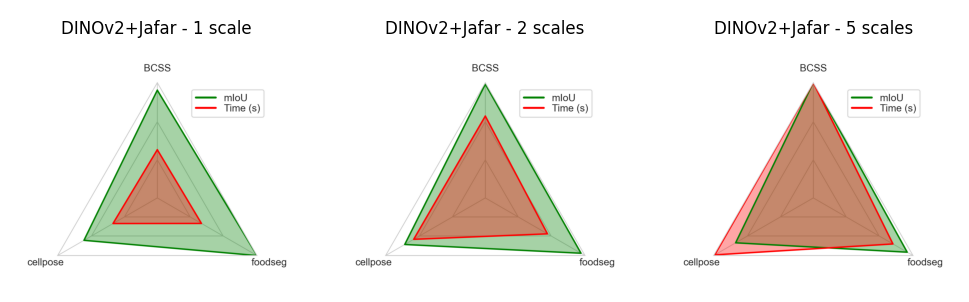

In [218]:
show_plots(["dino_jafar-s", "dino_jafar-m", "dino_jafar-l"], ["DINOv2+Jafar - 1 scale", "DINOv2+Jafar - 2 scales", "DINOv2+Jafar - 5 scales"])

### Combo FEs

Convpaint's Architecture allows to combine feature extracted from multiple models for training and inference by simply concatenating the feature vectors, treating them like **a single, unified representation** of the input data. This enables the model to **leverage the strengths of each individual feature extractor**, resulting in improved performance across a variety of tasks.

Given the models used in Convpaint, we have initially implemented the following **combo models**, whereas it is very straight-forward to define new ones:

- **DINOv2 + Guassian** : Semantic understanding with fast, simple, finegrained details
- **DINOv2 + VGG16 (small)** : Semantic understanding and rich feature representation with strong spatial awareness
- **DINOv2 + Ilastik** : Semantic understanding with local image context

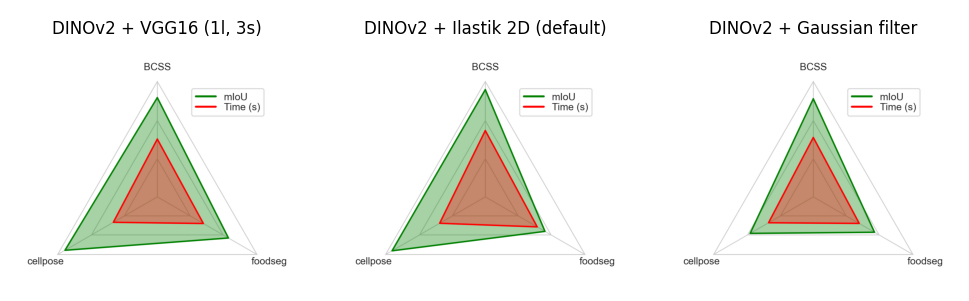

In [219]:
show_plots(["combo_dinov2_vgg16", "combo_dinov2_ilastik", "combo_dinov2_gauss"], ["DINOv2 + VGG16 (1l, 3s)", "DINOv2 + Ilastik 2D (default)", "DINOv2 + Gaussian filter"])

## Standard models with aliases

Currently, the following standard models are defined and can be **specified directly by aliases** when initializing a ConvpaintModel:

alias | description
--- | -
"vgg":         | standard vgg16 model with 1 layer and 3 scalings
"vgg-m":       | larger vgg16 model with the first 3 convolutional layers and 3 scalings (1, 2 and 4)
"vgg-l":       | very large vgg16 model with 5 layers and 4 scalings
"dino":        | standard dinov2_vits14_reg model (small model with registers, proven to be sufficient for most tasks)
"gaussian":    | simple gaussian_features model
"cellpose":    | cellpose_backbone model
"ilastik":     | ilastik_2d model (without any additional scalings)
"dino-jafar":  | model extracting dinov2 features (dinov2_vits14_reg) and improving resolution using JAFAR